In [1]:
"""
To find which Indian state has the highest sex ratio (female:male)
"""
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data/Report-39-20042015115405144AM-2012-2013_final.csv')

In [4]:
df.columns = ['state', 'total male','total female','sc male','sc female','st male','st female','obc male','obc female','pwd male','pwd female','muslim male','muslim female','mincom male','mincom female','foreign student male', 'foreign student female']

In [5]:
states = []
temp = df.state.map(lambda x: states.append(x))

In [6]:
def get_category_df(category):
    return pd.DataFrame({'Male': df['%s male' %category].copy(), 'Female':df['%s female' %category].copy(), 'State':df.state.copy()})

In [7]:
def get_sex_ratio(category='total'):
    counts = get_category_df(category)
    counts['ratio'] = counts.Female/counts.Male
    count = counts.set_index('State').copy()
    return count

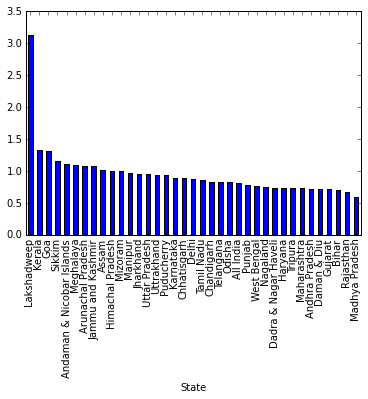

In [12]:
"""
State-wise bar graph of total sex ratio (female:male).
"""
r = get_sex_ratio()
srt_r = r.sort('ratio', ascending=False)
srt_r['ratio'].plot(kind='bar')

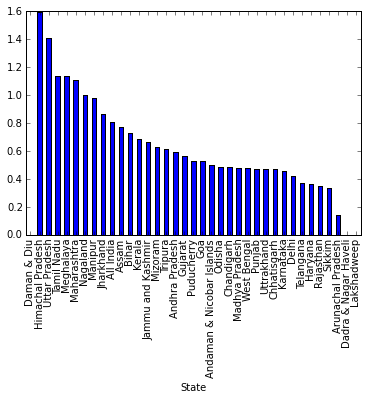

In [13]:
"""
State-wise sex-ratio of persons working in Public Works Department.
"""
r = get_sex_ratio('pwd')
srt_r = r.sort('ratio', ascending=False)
srt_r['ratio'].plot(kind='bar')

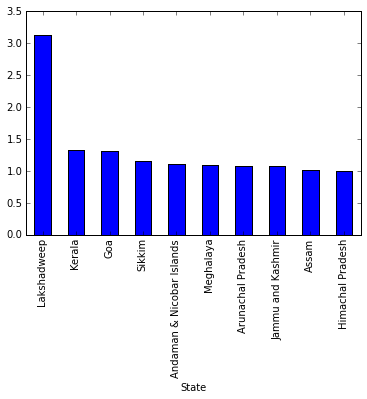

In [16]:
"""
State-wise bar graph of total sex ratio (female:male) greater than or equal to one.
"""
r = get_sex_ratio()
srt_r = r.sort('ratio', ascending=False)
srt_r[srt_r['ratio']>=1.0]['ratio'][:20].plot(kind='bar')